# Detecting Fake News
This advanced python project of detecting fake news deals with fake and real news. Using sklearn, we build a TfidfVectorizer on our dataset. Then, we initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.
#### TfIdfVectorizer-TF (Term Frequency) number of times a word appears in a document is its Term Frequency. IDF (Inverse Document Frequency) Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.
#### Passive Aggressive Classifier-Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [2]:
df=pd.read_csv("news.csv");
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.shape

(6335, 4)

In [4]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [5]:
df.apply(lambda x: sum(x.isnull()))

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
df.apply(lambda x: len(x.unique()))

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [7]:
df.value_counts()

Unnamed: 0  title                                                                               text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [8]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

## Split the Dataset

In [9]:
X_train,X_test,y_train,y_test=train_test_split(df['text'],labels,test_size=0.2,random_state=5)

In [10]:
# TfidfVectorizer with stop words from the English language and 
# a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). 
tf=TfidfVectorizer(stop_words="english",max_df=0.7) 
tf_train=tf.fit_transform(X_train)
tf_test=tf.transform(X_test)

In [11]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train,y_train)

y_predict=pac.predict(tf_test)
score=accuracy_score(y_test,y_predict)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 94.48%


In [12]:
#confusion matrix to gain insight into the number of false and true negatives and positives.
confusion_matrix(y_test,y_predict,labels=['FAKE','REAL'])

array([[602,  35],
       [ 35, 595]], dtype=int64)

So with this model, we have 607 true positives,593 true negatives,37 false positives, and 30 false negatives.

Text(0.5, 1.0, 'Fake News Detection')

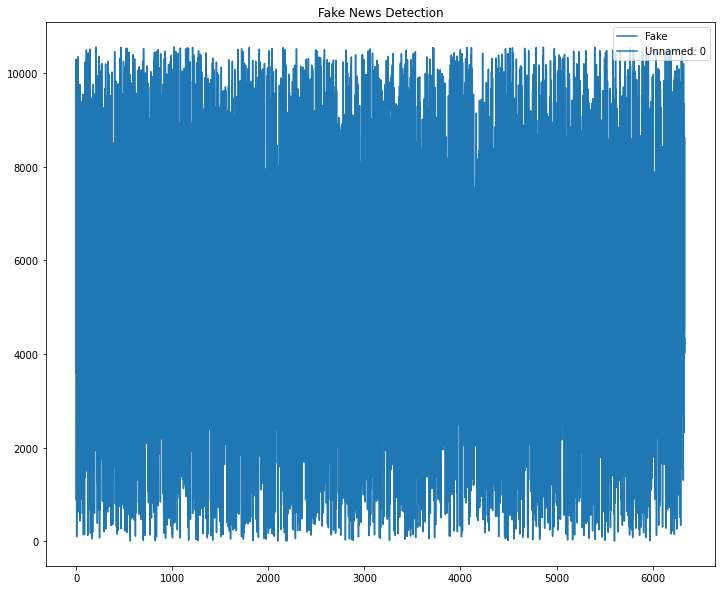

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.lineplot(data=df,label="Fake")
plt.title("Fake News Detection")

## Conclusion
We took a political dataset, implemented a TfidfVectorizer, initialized a PassiveAggressiveClassifier, and fit our model. We ended up obtaining an accuracy of 94.71% in magnitude.